[[-5386. -5362. -5340. ... -5408. -5380. -5358.]
 [-5380. -5354. -5332. ... -5412. -5390. -5372.]
 [-5376. -5350. -5326. ... -5414. -5400. -5390.]
 ...
 [-5452. -5446. -5432. ... -5508. -5528. -5544.]
 [-5418. -5416. -5406. ... -5518. -5534. -5550.]
 [-5388. -5392. -5388. ... -5520. -5538. -5550.]]


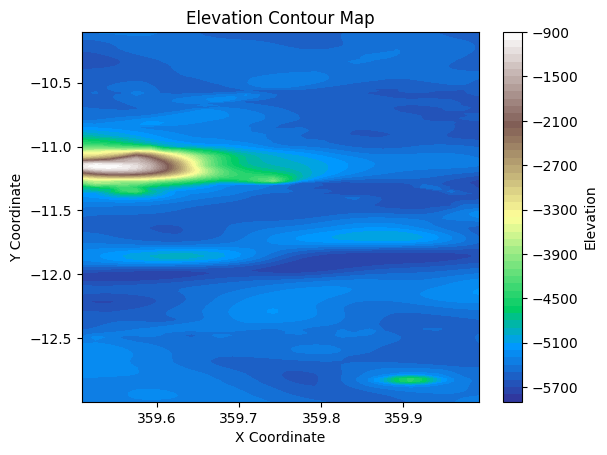

In [5]:
import numpy as np
import matplotlib.pyplot as plt

with open("elevationdata.txt", "r") as file:
    lines = file.readlines()

# Initialize an array of zeros with the number of rows and 3 columns
data = np.zeros((len(lines), 3))

# Populate the array with the data from each line
for i, row in enumerate(lines):
    for k,j in enumerate(row.split()):
        #print(float(j))
        data[i,k] = float(j)  # Convert each element to float
#print(data)

x = np.unique(data[:, 0])
y = np.unique(data[:, 1])
#print(x,y)
# Create a meshgrid for X and Y
X, Y = np.meshgrid(x, y)

Z = np.empty((len(y), len(x)))
# Reshape Z values to match the shape of X and Y grids
for i, row in enumerate(lines):
    #if float(row.split()[2]) > -2000:
    #print(row[2])
    Z[np.where(y == data[i, 1])[0][0], np.where(x == data[i, 0])[0][0]] = row.split()[2]

#Z = data[:, 2].reshape(len(y), len(x))
print(Z)
# Plot the contour
plt.contourf(X, Y, Z, levels=50, cmap="terrain")
plt.colorbar(label="Elevation")
plt.title("Elevation Contour Map")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [ ]:
with open('vrp_output.txt', 'r') as file:  
    lines = file.readlines()

x_coords = []
y_coords = []
for line in lines:
    line = line.strip()
    values = eval(line)  # This converts the string "(116, 0, 117, 0)" into a tuple (116, 0, 117, 0)
    x_coords.append(values[0])
    y_coords.append(values[1])
#print(Y[0])
X_plot = [y[i] for i in x_coords]
Y_plot = [x[i] for i in y_coords]
print(X_plot,Y_plot)



[np.float64(-11.1047), np.float64(-10.4334), np.float64(-12.9304), np.float64(-12.2147), np.float64(-12.0843), np.float64(-11.8397), np.float64(-12.0517), np.float64(-10.5809), np.float64(-11.7092), np.float64(-11.8234), np.float64(-12.3775), np.float64(-10.8757), np.float64(-11.2846), np.float64(-10.6464), np.float64(-12.7517), np.float64(-12.1332), np.float64(-11.6276), np.float64(-10.4334), np.float64(-10.3515), np.float64(-10.1711), np.float64(-11.399), np.float64(-12.0517), np.float64(-11.2028), np.float64(-10.4662), np.float64(-12.7679), np.float64(-11.6439), np.float64(-12.8817), np.float64(-12.7354), np.float64(-10.3679), np.float64(-12.7842), np.float64(-12.2472), np.float64(-10.8593), np.float64(-11.1701), np.float64(-11.4643), np.float64(-11.7745), np.float64(-12.9142), np.float64(-12.9791), np.float64(-10.9411), np.float64(-12.8654), np.float64(-11.8071), np.float64(-12.9629), np.float64(-11.35), np.float64(-10.4498), np.float64(-11.9213), np.float64(-12.5565), np.float64(-

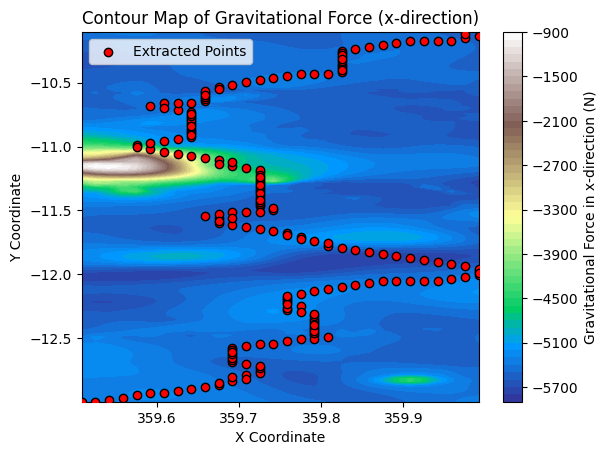

In [7]:

m = 1.0    # mass in kg
g = 9.81   # gravitational acceleration in m/s²

# Initialize force array
f = np.zeros((Z.shape[0] - 1, Z.shape[1] - 1, 8))

# Loop through the coordinates within bounds to calculate forces
for i in range(Z.shape[0] - 1):
    for j in range(Z.shape[1] - 1):
        # upwards
        f[i, j, 0] = m * g * (Z[i + 1, j] - Z[i, j])
        # downwards
        f[i, j, 1] = -m * g * (Z[i + 1, j] - Z[i, j])
        
        #right (positive)
        f[i, j, 2] = m * g * (Z[i, j + 1] - Z[i, j])
        #left (negative)
        f[i, j, 3] = -m * g * (Z[i, j + 1] - Z[i, j])

        #diagonals
        f[i, j, 4] = np.sqrt(2) * m * g * (Z[i+1, j + 1] - Z[i, j])
        f[i, j, 5] = np.sqrt(2) * m * g * (Z[i, j] - Z[i+1, j+1])
        f[i, j, 6] = np.sqrt(2) * m * g * (Z[i, j + 1] - Z[i+1, j])
        f[i, j, 7] = np.sqrt(2) * m * g * (Z[i + 1, j] - Z[i, j + 1])




#plt.contourf(X[:-1, :-1], Y[:-1, :-1], f[:, :, 7], levels=1000, cmap="terrain", zorder = 1)
plt.contourf(X, Y, Z, levels=50, cmap="terrain")
plt.title("Contour Map of Gravitational Force (x-direction)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.colorbar(label="Gravitational Force in x-direction (N)")
plt.scatter(Y_plot, X_plot, color = "red", edgecolor="black", label="Extracted Points", zorder=10)


plt.title("Contour Map of Gravitational Force (x-direction)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()



